# Exploratory Data Analysis of a runkeeper app for cardio activities

One key feature of the  Runkeeper app is; its excellent data export. Anyone who has a smartphone can download the app and analyze their data. so the analysis on this notebook goes down since the year 2012 of usage.

In [1]:
#get libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load data

In [2]:
#load data from disk
file_loca='cardioActivities.csv'
cardio=pd.read_csv(file_loca, parse_dates=True, index_col='Date')
cardio.head(n=3)

,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2018-11-11 14:05:00,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40:00,05:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
2018-09-11 15:02:00,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,01:14:12,05:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2018-04-11 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,01:15:16,05:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx


In [3]:
# Print DataFrame summary
cardio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:00 to 2012-08-22 18:53:00
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

In [4]:
#print rows and columns
cardio.shape

(508, 13)

# Preprocess data

There are missing values using the info() method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the Notes column, it is an optional field that I sometimes left blank. Also, I only used the Route Name column once, and never used the Friend's Tagged column.

Filling in the missing values in the heart rate column to avoid misleading results later, but right now,the first data preprocessing steps will be to:

Remove columns not useful for our analysis.
Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.
Count missing values.

In [5]:
#list of columns to delete
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete columns
cardio.drop(columns=cols_to_drop, inplace=True)

# Count types of training activities
display(cardio['Type'].value_counts())

# Count missing values for each column
cardio.isnull().sum()

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

In [6]:
# Rename 'Other' type to 'Unicycling'
cardio['Type'] = cardio['Type'].str.replace('Other', 'Unicycling')

# Handling the missing values

From the above output, there are 214 missing entries for my average heart rate.

I can't go back to get those data, but we can fill in the missing values with an average value. This process is called mean imputation. When imputing the mean to fill in missing data, there's need to consider that the average heart rate varies for different activities (e.g., walking vs. running).Filtering the DataFrames by activity type (Type) and calculate each activity's mean heart rate, then fill in the missing values with those means

In [7]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run =cardio[cardio['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle =cardio[cardio['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()

# Split whole DataFrame into several, specific for different activities
df_run = cardio[cardio['Type'] == 'Running'].copy()
df_walk = cardio[cardio['Type'] == 'Walking'].copy()
df_cycle = cardio[cardio['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
df_cycle['Average Heart Rate (bpm)'].fillna(int(avg_hr_cycle), inplace=True)

# Count missing values for each column in running data
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

# Plotting the running data

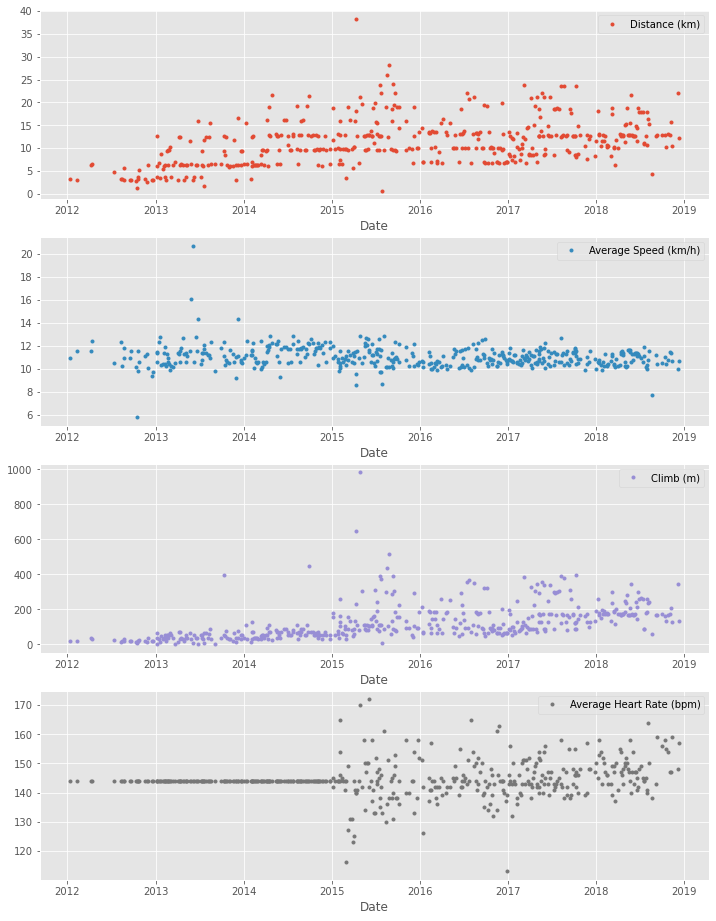

In [8]:
#set style 
plt.style.use('ggplot')
# Prepare data subsetting period from 2012 till 2019
# Create, plot and customize in one step
df_run.plot(subplots=True,sharex=False, figsize=(12,16),linestyle='none', marker='o', markersize=3)
plt.show()# display plot

# Running statistics

In [9]:
#In pandas, the resample() method is similar to the groupby() method - with resample() you group by a specific time span.resample() is used to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.
# Calculate annual statistics
print('average run looks in last 7 years:')
display(df_run.resample('A').mean())

# Calculate weekly statistics
print('Weekly averages of last 7 years:')
display(df_run.resample('W').mean().mean())

# Mean weekly counts
weekly_counts_average =df_run['Distance (km)'].resample('W').count().mean()
print('trainings per week I had on average:', weekly_counts_average)


average run looks in last 7 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2012-12-31,3.820476,10.671905,20.666667,144.000000
2013-12-31,7.549242,11.399545,45.166667,144.000000
2014-12-31,10.953043,11.519130,65.275362,144.000000
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of last 7 years:


Distance (km)                11.132359
Average Speed (km/h)         11.031694
Climb (m)                   120.495487
Average Heart Rate (bpm)    144.633875
dtype: float64

trainings per week I had on average: 1.2679558011049723


# Visualization with averages

plot for the long term averages of distance run and heart rate with their raw data to visually compare the averages to each training session.



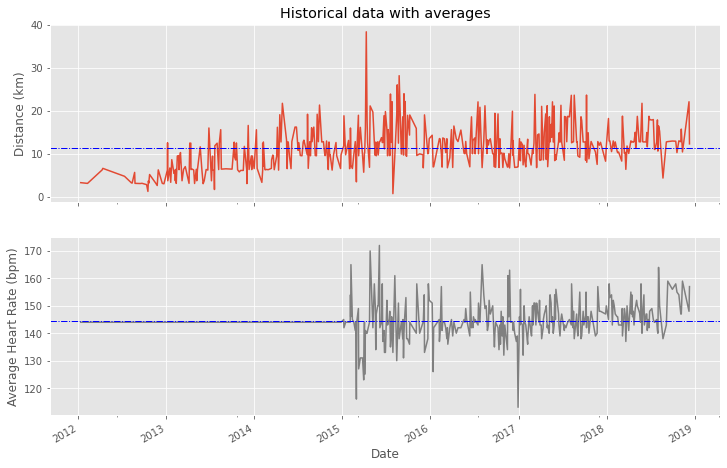

In [10]:
# Prepare data
runs_distance = df_run['Distance (km)']
runs_hr = df_run['Average Heart Rate (bpm)']

# Create plot
fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12, 8))

# Plot and customize first subplot
runs_distance.plot(ax=ax1)
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')

# Plot and customize second subplot
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='blue', linewidth=1, linestyle='-.')

# Show plot
plt.show()

# Visualizing the annual running distance (km) from 2012 through 2018 to see if goals were reached each year. Only stars in the green region indicate success.

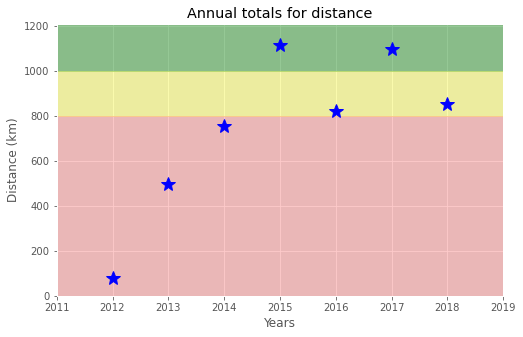

In [11]:
# Prepare data
df_run_dist_annual = df_run['Distance (km)'].resample('A').sum()

# Create plot
fig = plt.figure(figsize=(8, 5))

# Plot and customize
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')
ax.set(ylim=[0, 1210], 
       xlim=['2011','2019'],
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual totals for distance')

ax.axhspan(1000, 1210, color='green', alpha=0.4)
ax.axhspan(800, 1000, color='yellow', alpha=0.3)
ax.axhspan(0, 800, color='red', alpha=0.2)

# Show plot
plt.show()

- Ascertaining if progress is being made

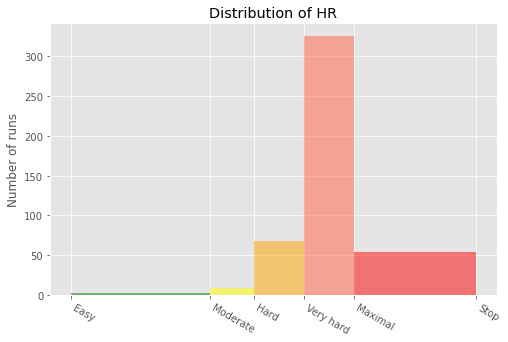

In [12]:
# Prepare data
hr_zones = [100, 125, 133, 142, 151, 173]
zone_names = ['Easy', 'Moderate', 'Hard', 'Very hard', 'Maximal','Stop']
zone_colors = ['green', 'yellow', 'orange', 'tomato', 'red']
df_run_hr_all = df_run['Average Heart Rate (bpm)']

# Create plot
fig, ax = plt.subplots(figsize=(8,5))

# Plot and customize
n, bins, patches = ax.hist(df_run_hr_all, bins=hr_zones, alpha=0.5)
for i in range(0, len(patches)):
    patches[i].set_facecolor(zone_colors[i])

ax.set(title='Distribution of HR', ylabel='Number of runs')
ax.xaxis.set(ticks=hr_zones)
ax.set_xticklabels(labels=zone_names, rotation=-30, ha='left')

# Show plot
plt.show()

# Detailed summary tables of training.

In [13]:
# Concatenating three DataFrames
df_run_walk_cycle = df_run.append(df_walk).append(df_cycle).sort_index(ascending=False)

dist_climb_cols, speed_col = ['Distance (km)', 'Climb (m)'], ['Average Speed (km/h)']

# Calculating total distance and climb in each type of activities
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

print('Totals for different training types:')
display(df_totals)

# Calculating summary statistics for each type of activities 
df_summary = df_run_walk_cycle.groupby('Type')[dist_climb_cols + speed_col].describe()

# Combine totals with summary
for i in dist_climb_cols:
    df_summary[i, 'total'] = df_totals[i]

print('Summary statistics for different training types:')
df_summary.stack()

Totals for different training types:


,Distance (km),Climb (m)
Type,,
Cycling,680.58,6976
Running,5224.50,57278
Walking,33.45,349


Summary statistics for different training types:


Average Speed (km/h)     Climb (m)  Distance (km)
Type                                                            
Cycling 25%               16.980000    139.000000      15.530000
        50%               19.500000    199.000000      20.300000
        75%               21.490000    318.000000      29.400000
        count             29.000000     29.000000      29.000000
        max               24.330000    553.000000      49.180000
        mean              19.125172    240.551724      23.468276
        min               11.380000     58.000000      11.410000
        std                3.257100    128.960289       9.451040
        total                   NaN   6976.000000     680.580000
Running 25%               10.495000     54.000000       7.415000
        50%               10.980000     91.000000      10.810000
        75%               11.520000    171.000000      13.190000
        count            459.000000    459.000000     459.000000
        max               20.720000    982.000000      38.320000
        mean              11.056296    124.788671      11.382353
        min                5.770000      0.000000       0.760000
        std                0.953273    103.382177       4.937853
        total                   NaN  57278.000000    5224.500000
Walking 25%                5.555000      7.000000       1.385000
        50%                5.970000     10.000000       1.485000
        75%                6.512500     15.500000       1.787500
        count             18.000000     18.000000      18.000000
        max                6.910000    112.000000       4.290000
        mean               5.549444     19.388889       1.858333
        min                1.040000      5.000000       1.220000
        std                1.459309     27.110100       0.880055
        total                   NaN    349.000000      33.450000